In [1]:
import numpy as np
import random as rand
from tqdm import tqdm
from matplotlib import pyplot as plt
import plotly.graph_objs as go
from scipy.ndimage import gaussian_filter
from scipy import ndimage

In [2]:
# Our possible cards
cards = [1, 2, 3]

# 1 = jack
# 2 = queen
# 3 = king

In [3]:
# function that gives both players a (different) card
def card_dealer(cards):
    return rand.sample(cards, 2)

# function that plays the game
def poker_play(cards, p1_strat, p2_strat):
    # deal the cards
    p1_card, p2_card = card_dealer(cards)
    
    # two options; 0=fold, 1=bet
    bet_or_fold = [0, 1]
    
    # player 1 decides what he does
    p1_play = rand.choices(bet_or_fold, weights=(1 - p1_strat[p1_card], p1_strat[p1_card]))[0]
    
    # if player 1 folds, return stakes
    if p1_play == 0:
        return -1, 1
    
    # player 2 decides what he does
    p2_play = rand.choices(bet_or_fold, weights=(1 - p2_strat[p2_card], p2_strat[p2_card]))[0]
    
    # if player 2 folds, return stakes
    if p2_play == 0:
        return 1, -1 
    
    # else check who has the highest
    if p1_card > p2_card:
        return 2, -2
    else:
        return -2, 2

In [4]:
# Select a number of games
num_games = 100000

# When p2_strat is certain
p2_strat = {1: 0, 2: 1/3, 3: 1}

# all variations of p1_strat betting on jack
bet_strats = np.linspace(0, 1, 101)

# list to keep track of all 101 scores
all_p1_scores = []

# playing all different betting strats
for jack_bet in tqdm(bet_strats):
    # initialize player 1's score
    p1_score = 0
    
    # choose the current strat for p1
    p1_strat = {1: jack_bet, 2: 1, 3: 1}
    
    # play the games
    for i in range(num_games):
        p1, p2 = poker_play(cards, p1_strat, p2_strat)
        p1_score += p1 / num_games
        
    all_p1_scores.append(p1_score)

100%|████████████████████████████████████████████████████████████████████████████████| 101/101 [01:32<00:00,  1.09it/s]


In [5]:
# Select a number of games
num_games = 100000

# When p1_strat is certain
p1_strat = {1: 1/3, 2: 1, 3: 1}

# all variations of p2_strat betting on queen
bet_strats = np.linspace(0, 1, 101)

# list to keep track of all 101 scores
all_p2_scores = []

# playing all different betting strats
for queen_bet in tqdm(bet_strats):
    # initialize player 1's score
    p2_score = 0
    
    # choose the current strat for p1
    p2_strat = {1: 0, 2: queen_bet, 3: 1}
    
    # play the games
    for i in range(num_games):
        p1, p2 = poker_play(cards, p1_strat, p2_strat)
        p2_score += p2 / num_games
        
    all_p2_scores.append(p2_score)

100%|████████████████████████████████████████████████████████████████████████████████| 101/101 [01:27<00:00,  1.16it/s]


Average scores
Player 1:  -0.1116042574258263
Player 2:  0.1109493069307511


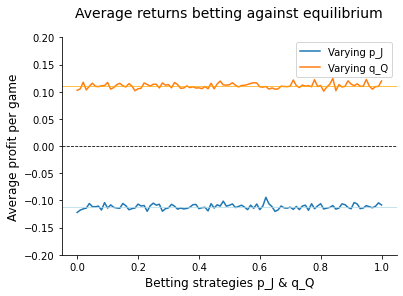

In [46]:
# Plotting both of these results in one figure

# Calculating the averages
p1_avg = sum(all_p1_scores) / len(all_p1_scores)
p2_avg = sum(all_p2_scores) / len(all_p2_scores)

print("Average scores")
print("Player 1: ", p1_avg)
print("Player 2: ", p2_avg)

# create a figure and axis
fig, ax = plt.subplots()

# set the y-axis limits
ax.set_ylim([-0.2, 0.2])

# plot the two lists
ax.plot(bet_strats, all_p1_scores)
ax.plot(bet_strats, all_p2_scores)

# add a horizontal grid line at y=0
ax.axhline(y=0, color='black', linestyle='--', linewidth=0.8)
ax.axhline(y=p1_avg, color='lightblue', linestyle='-', linewidth=0.7)
ax.axhline(y=p2_avg, color='orange', linestyle='-', linewidth=0.7)

# add axis labels and a title
ax.set_xlabel('Betting strategies p_J & q_Q', fontsize=12)
ax.set_ylabel('Average profit per game', fontsize=12)
ax.set_title('Average returns betting against equilibrium', fontsize=14, pad=20)

# add a legend
ax.legend(['Varying p_J', 'Varying q_Q'])

# remove the top and right axes lines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# show the plot
plt.show()

In [7]:
# Mixing both

# Takes about 10 minutes to run (101 iterations)

# Select a number of games
num_games = 10000

# all variations of the betting strategies
# p1 betting on jack
# p2 betting on queen
bet_strats = np.linspace(0, 1, 101)

# matrix to keep track of all p1_scores (p2_scores is just 0 - p1_score)
p1_scores_matrix = np.zeros((len(bet_strats), len(bet_strats)))

# loop over all different strategies for player 1
for row, jack_bet in tqdm(enumerate(bet_strats)):
    p1_strat = {1: jack_bet, 2: 1, 3: 1}
    
    # loop over all different strategies for player 2
    for col, queen_bet in enumerate(bet_strats):
        p1_score = 0
        p2_strat = {1: 0, 2: queen_bet, 3: 1}
        
        # play the games
        for i in range(num_games):
            p1, p2 = poker_play(cards, p1_strat, p2_strat)
            p1_score += p1 / num_games

        p1_scores_matrix[row][col] = p1_score
        
print(p1_scores_matrix)   

101it [13:16,  7.89s/it]

[[-0.1567 -0.1553 -0.1832 ... -0.0163 -0.0282  0.013 ]
 [-0.1756 -0.1693 -0.1739 ... -0.02   -0.0069 -0.0101]
 [-0.1741 -0.156  -0.1722 ...  0.011   0.0149  0.0169]
 ...
 [ 0.0143  0.0033 -0.0237 ... -0.324  -0.3426 -0.3466]
 [ 0.0169 -0.0158  0.0064 ... -0.3163 -0.3312 -0.3222]
 [-0.0212 -0.0058 -0.0196 ... -0.3345 -0.3222 -0.3436]]


In [39]:
# get x and y values from the matrix indices
x = np.arange(101)
y = np.arange(101)
x, y = np.meshgrid(x, y)

# create a 3D surface plot with plotly
fig = go.Figure(data=[go.Surface(z=p1_scores_matrix, x=x, y=y)])
fig.update_layout(scene=dict(
                    xaxis_title='q_Q',
                    yaxis_title='p_J',
                    zaxis_title='Avg return Player 1'),
                    width=700,
                    margin=dict(r=20, b=10, l=10, t=10))

fig.show()

In [42]:
# get x and y values from the matrix indices
x = np.arange(101)
y = np.arange(101)
x, y = np.meshgrid(x, y)

# create a 3D surface plot with plotly
fig = go.Figure(data=[go.Surface(z=p1_scores_matrix, x=x, y=y)])

# add a scatter trace for the highlighted point
fig.add_trace(go.Scatter3d(
    x=[33], y=[33], z=[p1_scores_matrix[33, 33]],
    mode='markers',
    marker=dict(size=10, color='red')
))

fig.update_layout(scene=dict(
                    xaxis_title='q_Q',
                    yaxis_title='p_J',
                    zaxis_title='Avg return Player 1'),
                    width=700,
                    margin=dict(r=20, b=10, l=10, t=10))

fig.show()

In [43]:
# apply Gaussian filter with sigma=3 to smooth the data
p1_matrix = gaussian_filter(p1_scores_matrix, sigma=3)

# get x and y values from the matrix indices
x = np.arange(101)
y = np.arange(101)
x, y = np.meshgrid(x, y)

# create a 3D surface plot with plotly
fig = go.Figure(data=[go.Surface(z=p1_matrix, x=x, y=y)])

# add a scatter trace for the highlighted point
fig.add_trace(go.Scatter3d(
    x=[33], y=[33], z=[p1_matrix[33, 33]],
    mode='markers',
    marker=dict(size=10, color='red')
))

fig.update_layout(scene=dict(
                    xaxis_title='q_Q',
                    yaxis_title='p_J',
                    zaxis_title='Avg return Player 1'),
                    width=700,
                    margin=dict(r=20, b=10, l=10, t=10))

fig.show()

In [ ]:
# get x and y values from the matrix indices
x = np.arange(101)
y = np.arange(101)
x, y = np.meshgrid(x, y)

# create a 3D surface plot with plotly
fig = go.Figure(data=[go.Surface(z=p1_matrix, x=x, y=y)])
fig.update_layout(scene=dict(
                    xaxis_title='q_Q',
                    yaxis_title='p_J',
                    zaxis_title='Avg return Player 1'),
                    width=700,
                    margin=dict(r=20, b=10, l=10, t=10))

fig.show()